In [121]:
#SVMs try to draw a street between classes and are less suceptible to new instances of data when compared to linear regressors
#they are sensitive to feature scale thus feature scaling is advised
#following code loads iris dataset,scales the features and then trains an svm model with C value of 1 and the hinge loss function
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [122]:
iris = datasets.load_iris()
X = iris['data'][:,(2,3)] #petal, length, petal width
y =(iris['target']==2).astype(np.float64)# Iris-Virginica
X,y

(array([[1.4, 0.2],
        [1.4, 0.2],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.7, 0.4],
        [1.4, 0.3],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.5, 0.1],
        [1.5, 0.2],
        [1.6, 0.2],
        [1.4, 0.1],
        [1.1, 0.1],
        [1.2, 0.2],
        [1.5, 0.4],
        [1.3, 0.4],
        [1.4, 0.3],
        [1.7, 0.3],
        [1.5, 0.3],
        [1.7, 0.2],
        [1.5, 0.4],
        [1. , 0.2],
        [1.7, 0.5],
        [1.9, 0.2],
        [1.6, 0.2],
        [1.6, 0.4],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.6, 0.2],
        [1.6, 0.2],
        [1.5, 0.4],
        [1.5, 0.1],
        [1.4, 0.2],
        [1.5, 0.1],
        [1.2, 0.2],
        [1.3, 0.2],
        [1.5, 0.1],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.3, 0.3],
        [1.3, 0.3],
        [1.3, 0.2],
        [1.6, 0.6],
        [1.9, 0.4],
        [1.4, 0.3],
        [1.6, 0.2],
        [1.4, 0.2],
        [1.5, 0.2],
        [1.4, 0.2],


In [123]:
svm_clf=Pipeline([('scaler', StandardScaler()),
                 ('linear_svc', LinearSVC(C=1, loss='hinge'))])
svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [124]:
svm_clf.predict([[5.5,1.7]]) # note svm do not output probabilities

array([1.])

In [125]:
#Non linear
#some data sets are not linearly seperable thus linear svm classifiers cannot be used, however the addition of polynomial features allows you to use them

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [126]:
% matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Text(0,0.5,'x2')

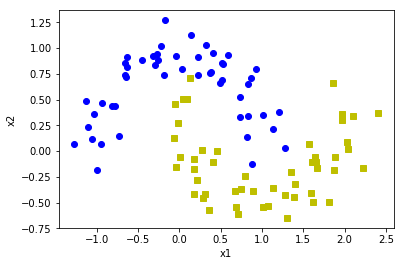

In [139]:
moons=make_moons(n_samples=100, noise=0.15, random_state=42)
y=moons[1]
x_1=moons[0][:,0]
x_2=moons[0][:,1]
plt.plot(x_1[y==0],x_2[y==0],'bo')
plt.plot(x_1[y==1],x_2[y==1],'ys')
plt.xlabel('x1')
plt.ylabel('x2')


In [153]:
polynomial_svm_clf = Pipeline([
    ("poly_features",PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(moons[0],moons[1])

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [154]:
#adding polynomial features can lead to a combinatorial explosion of features to avoid this use the kernel trick provided by the svc class

In [155]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)) 
 ])
poly_kernel_svm_clf.fit(moons[0],moons[1])

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

Text(0,0.5,'x2')

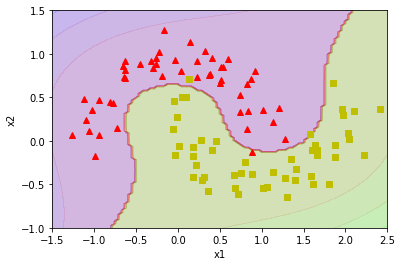

In [178]:
axes=[-1.5, 2.5, -1, 1.5]
x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)
X = np.c_[x0.ravel(), x1.ravel()]
y_pred = polynomial_svm_clf.predict(X).reshape(x0.shape)
y_decision = polynomial_svm_clf.decision_function(X).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plt.plot(x_1[y==0],x_2[y==0],'r^')
plt.plot(x_1[y==1],x_2[y==1],'ys')
plt.xlabel('x1')
plt.ylabel('x2')

In [164]:
y_decision.shape

(100, 100)

In [179]:
polynomial_svm_clf.decision_function?

In [168]:
polynomial_svm_clf.predict(X).shape

(10000,)

In [169]:
y_pred.shape

(100, 100)